<a href="https://colab.research.google.com/github/MuhammadAfif120/Tugas-BK-Persiapan-Sertifikasi-Hungarian.data-/blob/main/Latihan_BK_Data_Science_16_12_2023_(hungarian_data)_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **PROJECT BIMBINGAN KARIR DATA SCIENCE HUNGARIAN**





> Nama  : Muhammad Afif Naufal Ardani

> NIM   : A11.2020.12633

> Kelas : BKDS01 - Data Scientist

## **1) Pengumpulan Data**

Dataset yang akan digunakan adalah dataset yang bersumber dari https://archive.ics.uci.edu/dataset/45/heart+disease

Secara spesifik dataset yang digunakan pada project ini adalah dataset dengan nama "hungarian.data"

## **2) Menelaah Data**

In [46]:
# File Library yang digunakan untuk project Hungarian.data
import numpy as np      # Numpy untuk numerical, multi-dimensional array dan matrices
import pandas as pd     # pandas menyediakan data structures seperti Data Frame yang mudah digunakan
import itertools        # modul untuk memudahkan iterators (pengulangan) dengan cepat dan tidak memakan memory
import re               # modul yang menyediakan regular expression


### **Load Data**

**PENDEKATAN PERTAMA UNTUK MEMBUKA DATABASE**

In [47]:
# Menyimpan file di
# (WARNING) File dataset harus ditambahkan didalam menu 'files' yang ada di google colab, jika tidak maka kode eror
folder = 'hungarian.data'

In [48]:
# Kode Iterasi untuk membaca dataset
with open(folder, encoding='Latin1') as file:
   lines = [line.strip() for line in file]

lines [0:10]

['1254 0 40 1 1 0 0',
 '-9 2 140 0 289 -9 -9 -9',
 '0 -9 -9 0 12 16 84 0',
 '0 0 0 0 150 18 -9 7',
 '172 86 200 110 140 86 0 0',
 '0 -9 26 20 -9 -9 -9 -9',
 '-9 -9 -9 -9 -9 -9 -9 12',
 '20 84 0 -9 -9 -9 -9 -9',
 '-9 -9 -9 -9 -9 1 1 1',
 '1 1 -9. -9. name']

**PENDEKATAN KEDUA UNTUK IMPORT DATABASE**

In [49]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [50]:
!ls "/content/drive/MyDrive/Dataset/hungarian.data"

/content/drive/MyDrive/Dataset/hungarian.data


In [51]:
with open(folder, encoding='Latin1') as file:
   lines = [line.strip() for line in file]

lines [0:10]

['1254 0 40 1 1 0 0',
 '-9 2 140 0 289 -9 -9 -9',
 '0 -9 -9 0 12 16 84 0',
 '0 0 0 0 150 18 -9 7',
 '172 86 200 110 140 86 0 0',
 '0 -9 26 20 -9 -9 -9 -9',
 '-9 -9 -9 -9 -9 -9 -9 12',
 '20 84 0 -9 -9 -9 -9 -9',
 '-9 -9 -9 -9 -9 1 1 1',
 '1 1 -9. -9. name']

In [52]:
data = itertools.takewhile(
    lambda x: len(x) == 76,
    (' '.join(lines[i:(i + 10)]).split() for i in range(0, len(lines), 10))
)

# deklarasi variabel df untuk memanggil, membaca, mengload data
df = pd.DataFrame.from_records(data)

# Memanggil 5 data teratas pada dataset
df.head()

,0,1,2,3,4,5,6,7,8,9,...,66,67,68,69,70,71,72,73,74,75
0,1254,0,40,1,1,0,0,-9,2,140,...,-9,-9,1,1,1,1,1,-9.,-9.,name
1,1255,0,49,0,1,0,0,-9,3,160,...,-9,-9,1,1,1,1,1,-9.,-9.,name
2,1256,0,37,1,1,0,0,-9,2,130,...,-9,-9,1,1,1,1,1,-9.,-9.,name
3,1257,0,48,0,1,1,1,-9,4,138,...,2,-9,1,1,1,1,1,-9.,-9.,name
4,1258,0,54,1,1,0,1,-9,3,150,...,1,-9,1,1,1,1,1,-9.,-9.,name


In [53]:
# Melihat informasi mengenai keseluruhan atribut
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 76 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       294 non-null    object
 1   1       294 non-null    object
 2   2       294 non-null    object
 3   3       294 non-null    object
 4   4       294 non-null    object
 5   5       294 non-null    object
 6   6       294 non-null    object
 7   7       294 non-null    object
 8   8       294 non-null    object
 9   9       294 non-null    object
 10  10      294 non-null    object
 11  11      294 non-null    object
 12  12      294 non-null    object
 13  13      294 non-null    object
 14  14      294 non-null    object
 15  15      294 non-null    object
 16  16      294 non-null    object
 17  17      294 non-null    object
 18  18      294 non-null    object
 19  19      294 non-null    object
 20  20      294 non-null    object
 21  21      294 non-null    object
 22  22      294 non-null    ob

In [54]:
# Penghapusan atribut pertama dan terakhir karena tidak relevan dengan data yang akan digunakan
df = df.iloc[:,:-1]
df = df.drop(df.columns[0], axis =1)

In [55]:
# Merubah tipe dari keseluruhan atribut menjadi tipe data float
df = df.astype(float)

In [56]:
# Melihat apakah tipe data dari dataset sudah berubah
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 74 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       294 non-null    float64
 1   2       294 non-null    float64
 2   3       294 non-null    float64
 3   4       294 non-null    float64
 4   5       294 non-null    float64
 5   6       294 non-null    float64
 6   7       294 non-null    float64
 7   8       294 non-null    float64
 8   9       294 non-null    float64
 9   10      294 non-null    float64
 10  11      294 non-null    float64
 11  12      294 non-null    float64
 12  13      294 non-null    float64
 13  14      294 non-null    float64
 14  15      294 non-null    float64
 15  16      294 non-null    float64
 16  17      294 non-null    float64
 17  18      294 non-null    float64
 18  19      294 non-null    float64
 19  20      294 non-null    float64
 20  21      294 non-null    float64
 21  22      294 non-null    float64
 22  23

## **3) Validasi Data**

Tahapan ketiga digunakan untuk mengetahui dan memahami isi dari dataset agar dapat dilakukan penanganan sesuai dengan kebutuhan

In [57]:
# Merubah nilai -9.0 pada dataset menjadi nilai null value
df.replace(-9.0, np.nan, inplace = True)

# print(df)

In [58]:
# Melihat total nilai null setiap atribut yang ada pada dataset
df.isnull().sum()

1       0
2       0
3       0
4       0
5       0
     ... 
70      0
71      0
72      0
73    266
74    294
Length: 74, dtype: int64

In [59]:
# Melihat penyebaran nilai null pada dataset
df.head()

,1,2,3,4,5,6,7,8,9,10,...,65,66,67,68,69,70,71,72,73,74
0,0.0,40.0,1.0,1.0,0.0,0.0,NaN,2.0,140.0,0.0,...,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN
1,0.0,49.0,0.0,1.0,0.0,0.0,NaN,3.0,160.0,1.0,...,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN
2,0.0,37.0,1.0,1.0,0.0,0.0,NaN,2.0,130.0,0.0,...,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN
3,0.0,48.0,0.0,1.0,1.0,1.0,NaN,4.0,138.0,0.0,...,NaN,2.0,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN
4,0.0,54.0,1.0,1.0,0.0,1.0,NaN,3.0,150.0,0.0,...,NaN,1.0,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 74 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       294 non-null    float64
 1   2       294 non-null    float64
 2   3       294 non-null    float64
 3   4       294 non-null    float64
 4   5       294 non-null    float64
 5   6       294 non-null    float64
 6   7       0 non-null      float64
 7   8       294 non-null    float64
 8   9       293 non-null    float64
 9   10      293 non-null    float64
 10  11      271 non-null    float64
 11  12      12 non-null     float64
 12  13      1 non-null      float64
 13  14      0 non-null      float64
 14  15      286 non-null    float64
 15  16      21 non-null     float64
 16  17      1 non-null      float64
 17  18      293 non-null    float64
 18  19      294 non-null    float64
 19  20      294 non-null    float64
 20  21      294 non-null    float64
 21  22      293 non-null    float64
 22  23

## **4) Menentukan Objek Data**

Tahapan keempat digunakan untuk memilih fitur-fitur yang digunakan sesuai dengan keterangan dataset tersebut

In [61]:
# Memilih 14 fitur yang sudah disesuaikan dalam keterangan dataset dan menyimpannya didalam variabel 'df_selected'
df_selected = df.iloc[:, [1, 2, 7, 8, 10, 14, 17, 30, 36, 38, 39, 42, 49, 56]]

In [62]:
# Pengecekan apakah atribut yang telah terpilih terpanggil seluruhnya
df_selected.head()

,2,3,8,9,11,15,18,31,37,39,40,43,50,57
0,40.0,1.0,2.0,140.0,289.0,0.0,0.0,172.0,0.0,0.0,NaN,NaN,NaN,0.0
1,49.0,0.0,3.0,160.0,180.0,0.0,0.0,156.0,0.0,1.0,2.0,NaN,NaN,1.0
2,37.0,1.0,2.0,130.0,283.0,0.0,1.0,98.0,0.0,0.0,NaN,NaN,NaN,0.0
3,48.0,0.0,4.0,138.0,214.0,0.0,0.0,108.0,1.0,1.5,2.0,NaN,NaN,3.0
4,54.0,1.0,3.0,150.0,NaN,0.0,0.0,122.0,0.0,0.0,NaN,NaN,NaN,0.0


In [63]:
# Melihat informasi dari 14 atribut yang telah dipilih
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2       294 non-null    float64
 1   3       294 non-null    float64
 2   8       294 non-null    float64
 3   9       293 non-null    float64
 4   11      271 non-null    float64
 5   15      286 non-null    float64
 6   18      293 non-null    float64
 7   31      293 non-null    float64
 8   37      293 non-null    float64
 9   39      294 non-null    float64
 10  40      104 non-null    float64
 11  43      4 non-null      float64
 12  50      28 non-null     float64
 13  57      294 non-null    float64
dtypes: float64(14)
memory usage: 32.3 KB


In [64]:
# Memberikan nama atribut sesuai dengan ketentuan yang sudah dijabarkan pada website dataset ini diambil dan diamsukkan kedalam variabel 'column_mapping'

# Penjelasan setiap atributnya:
# Age = Usia
# Sex = Jenis Kelamin
# Cp = Chest Pain (Tipe sakit dada)
# Trestbps = Resting blood pressure (Tekanan darah saat istirahat)
# Chol = Cholesterol (Kolesterol)
# Fbs = Fasting blood sugar (Kadar gula darah saat berpuasa)
# Restecg = Resting electrocardiographic (Aktivitas listrik jantung saat istirahat)
# Thalach = Maximum heart rate (Nilai maximum detak jantung)
# Exang = Exercise induced angina (Olahraga yang menyebabkan angin duduk)
# Oldpeak = ST depression induced by exercise relative to rest (Posisi grafik EKG dibawah batas normal saat istirahat)
# Slope = The slope of the peak exercise ST segment
# Ca = Number of major vessels (Jumlah dari sirkulasi saluran darah utama)
# Tal =
# Target = Diagnosis dari penyakit jantung

column_mapping = {
    2: 'age',
    3: 'sex',
    8: 'cp',
    9: 'trestbps',
    11: 'chol',
    15: 'fbs',
    18: 'restecg',
    31: 'thalach',
    37: 'exang',
    39: 'oldpeak',
    40: 'slope',
    43: 'ca',
    50: 'tal',
    57: 'target',
}

In [65]:
# Merubah ke 14 atribut menjadi sebuah nama yang sudah ditentukan pada variabel 'column_mapping'
df_selected.rename(columns = column_mapping, inplace = True)

<ipython-input-65-c1f0066fc2ef>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.rename(columns = column_mapping, inplace = True)


In [66]:
# Pengecekan apakah nama dari 14 atribut sudah berganti
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       294 non-null    float64
 1   sex       294 non-null    float64
 2   cp        294 non-null    float64
 3   trestbps  293 non-null    float64
 4   chol      271 non-null    float64
 5   fbs       286 non-null    float64
 6   restecg   293 non-null    float64
 7   thalach   293 non-null    float64
 8   exang     293 non-null    float64
 9   oldpeak   294 non-null    float64
 10  slope     104 non-null    float64
 11  ca        4 non-null      float64
 12  tal       28 non-null     float64
 13  target    294 non-null    float64
dtypes: float64(14)
memory usage: 32.3 KB


In [67]:
# Melihat total fitur dari atribut dataset tersebut
df_selected.value_counts()

age   sex  cp   trestbps  chol   fbs  restecg  thalach  exang  oldpeak  slope  ca   tal  target
47.0  1.0  4.0  150.0     226.0  0.0  0.0      98.0     1.0    1.5      2.0    0.0  7.0  1.0       1
dtype: int64

## **5) Membersihkan Data**

Tahapan kelima digunakan untuk memberishkan data agar dapat menghasilkan model yang akurat

In [68]:
# Melihat jumlah null dari seluruh atribut pada dataset
df_selected.isnull().sum()

age           0
sex           0
cp            0
trestbps      1
chol         23
fbs           8
restecg       1
thalach       1
exang         1
oldpeak       0
slope       190
ca          290
tal         266
target        0
dtype: int64

Setelah dilakukan pengecakan didapatkan atribut "slope", "ca", dan "tal" memiliki nilai sebanyak 90% pada fitur yang bernilai null, maka perlu dilakukan penghapusan.

In [69]:
# Menghapus atribut 'slope', 'ca', dan 'tal'
columnDrop = ['slope', 'ca', 'tal']
df_selected = df_selected.drop(columnDrop, axis = 1)

In [70]:
# Pengecekan kembali setelah mengahpus beberapa atribut
df_selected.isnull().sum()

age          0
sex          0
cp           0
trestbps     1
chol        23
fbs          8
restecg      1
thalach      1
exang        1
oldpeak      0
target       0
dtype: int64

Didapatkan beberapa fitur masih memiliki nilai null tetapi tidak banyak, maka dari itu dapat dilakukan pengesian nilai null dengan menggunakan nilai mean dari setiap kolom

In [71]:
# Mengahpus keseluruhan nilai null pada setiap fitur yang ada
meanTBPS = df_selected['trestbps'].dropna()
meanCHOL = df_selected['chol'].dropna()
meanFBS = df_selected['fbs'].dropna()
meanRESTCG = df_selected['restecg'].dropna()
meanTHALACH = df_selected['thalach'].dropna()
meanEXANG = df_selected['exang'].dropna()

In [72]:
# Menghitung nilai mean dari setiap fitur
meanTBPS = round(meanTBPS.mean())
meanCHOL = round(meanCHOL.mean())
meanFBS = round(meanFBS.mean())
meanRESTCG = round(meanRESTCG.mean())
meanTHALACH = round(meanTHALACH.mean())
meanEXANG = round(meanEXANG.mean())

In [73]:
# Memasukkan nilai mean tersebut kedalam fitur untuk mengisi kekosongan nilai null yang telah dihapus
fill_values = {'trestbps' : meanTBPS, 'chol' : meanCHOL, 'fbs' : meanFBS, 'restecg' : meanRESTCG, 'thalach' : meanTHALACH, 'exang' : meanEXANG}
dfClean = df_selected.fillna(value = fill_values)

In [74]:
# Melihat informasi dari 14 fitur
dfClean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       294 non-null    float64
 1   sex       294 non-null    float64
 2   cp        294 non-null    float64
 3   trestbps  294 non-null    float64
 4   chol      294 non-null    float64
 5   fbs       294 non-null    float64
 6   restecg   294 non-null    float64
 7   thalach   294 non-null    float64
 8   exang     294 non-null    float64
 9   oldpeak   294 non-null    float64
 10  target    294 non-null    float64
dtypes: float64(11)
memory usage: 25.4 KB


In [75]:
# Mengecek kembali apakah terdapat fitur yang memiliki nilai null
dfClean.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
target      0
dtype: int64

In [76]:
# Pengecekan nilai duplikat dari dataset tersebut
duplicateData = dfClean.duplicated()
dfClean[duplicateData]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
163,49.0,0.0,2.0,110.0,251.0,0.0,0.0,160.0,0.0,0.0,0.0


In [77]:
# Pengecekan sumber nilai duplikat yang ada
print("All Duplicate Data on Rows:")
dfClean[dfClean.duplicated(keep = False)]

All Duplicate Data on Rows:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
90,49.0,0.0,2.0,110.0,251.0,0.0,0.0,160.0,0.0,0.0,0.0
163,49.0,0.0,2.0,110.0,251.0,0.0,0.0,160.0,0.0,0.0,0.0


In [78]:
# Penghapusan nilai duplikat
dfClean = dfClean.drop_duplicates()

print("All Duplicate Data on Rows:")
dfClean[dfClean.duplicated(keep = False)]

All Duplicate Data on Rows:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target


In [79]:
dfClean.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
0,40.0,1.0,2.0,140.0,289.0,0.0,0.0,172.0,0.0,0.0,0.0
1,49.0,0.0,3.0,160.0,180.0,0.0,0.0,156.0,0.0,1.0,1.0
2,37.0,1.0,2.0,130.0,283.0,0.0,1.0,98.0,0.0,0.0,0.0
3,48.0,0.0,4.0,138.0,214.0,0.0,0.0,108.0,1.0,1.5,3.0
4,54.0,1.0,3.0,150.0,251.0,0.0,0.0,122.0,0.0,0.0,0.0


In [80]:
dfClean['target'].value_counts()

0.0    187
1.0     37
3.0     28
2.0     26
4.0     15
Name: target, dtype: int64

In [81]:
# Beberapa library yang digunakan untuk memvisualisasikan dataset

import seaborn as sns             # Library untuk memvisualisasikan data dalam bentuk grafik
import matplotlib.pyplot as plt   # Library untuk menghasilkan 2D plotting dengan kualitas tinggi

In [82]:
dfClean.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
age,1.000000,0.014516,0.146616,0.246571,0.087101,0.181130,0.050672,-0.460514,0.239223,0.178172,0.210429
sex,0.014516,1.000000,0.245769,0.082064,0.027695,0.044372,-0.108656,-0.106959,0.154925,0.115959,0.220732
cp,0.146616,0.245769,1.000000,0.081293,0.134697,0.031930,-0.016372,-0.367819,0.494674,0.351735,0.427536
trestbps,0.246571,0.082064,0.081293,1.000000,0.080818,0.096222,0.011256,-0.181824,0.211507,0.204000,0.214898
chol,0.087101,0.027695,0.134697,0.080818,1.000000,0.107686,0.048081,-0.122038,0.161055,0.106743,0.256027
fbs,0.181130,0.044372,0.031930,0.096222,0.107686,1.000000,0.047988,-0.069722,0.115503,0.063179,0.154319
restecg,0.050672,-0.108656,-0.016372,0.011256,0.048081,0.047988,1.000000,0.006084,0.041290,0.042193,0.042643
thalach,-0.460514,-0.106959,-0.367819,-0.181824,-0.122038,-0.069722,0.006084,1.000000,-0.400508,-0.300458,-0.367525
exang,0.239223,0.154925,0.494674,0.211507,0.161055,0.115503,0.041290,-0.400508,1.000000,0.624965,0.571710
oldpeak,0.178172,0.115959,0.351735,0.204000,0.106743,0.063179,0.042193,-0.300458,0.624965,1.000000,0.580732


<Axes: >

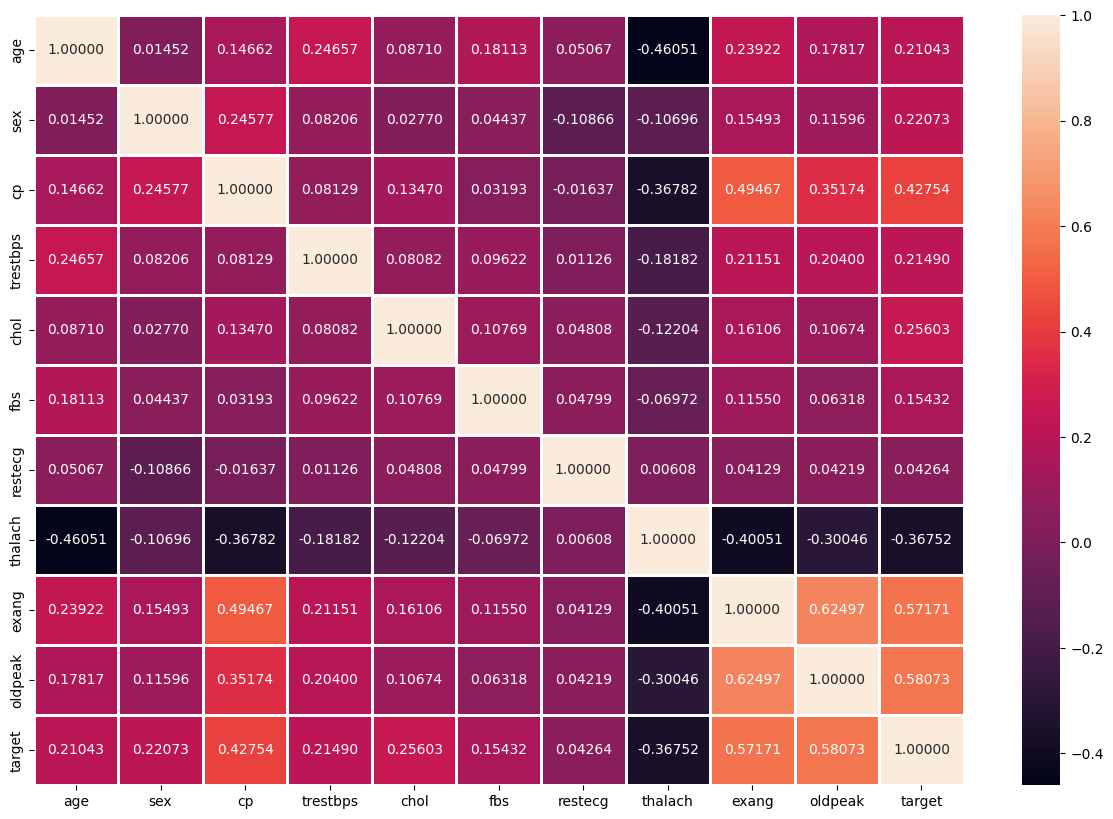

In [83]:
# Memvisualisasikan data menggunakan Heatmap

corData = dfClean.corr()
fig, ax= plt.subplots(figsize = (15, 10))
sns.heatmap(corData, annot = True, linewidths = 1, fmt = ".5f")